In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Components.loadDataset import loadDataset as ld
from Components.Models import Models as md 
from Components.Results import Results as rs
from MAEModify.error import calc_mae

2025-11-17 21:16:30.911554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763424990.927805   76364 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763424990.932828   76364 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-17 21:16:30.950052: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidge


████████╗██╗███╗   ███╗███████╗    ███████╗███████╗██████╗ ██╗███████╗███████╗    █████╗ ██╗
╚══██╔══╝██║████╗ ████║██╔════╝    ██╔════╝██╔════╝██╔══██╗██║██╔════╝██╔════╝   ██╔══██╗██║
   ██║   ██║██╔████╔██║█████╗█████╗███████╗█████╗  ██████╔╝██║█████╗  ███████╗   ███████║██║
   ██║   ██║██║╚██╔╝██║██╔══╝╚════╝╚════██║██╔══╝  ██╔══██╗██║██╔══╝  ╚════██║   ██╔══██║██║
   ██║   ██║██║ ╚═╝ ██║███████╗    ███████║███████╗██║  ██║██║███████╗███████║██╗██║  ██║██║
   ╚═╝   ╚═╝╚═╝     ╚═╝╚══════╝    ╚══════╝╚══════╝╚═╝  ╚═╝╚═╝╚══════╝╚══════╝╚═╝╚═╝  ╚═╝╚═╝
ai4ts v0.0.3 - building AI for unified time-series analysis, https://time-series.ai 



In [2]:
#Carrega o dataset physionet
physionet2012_dataset = ld.load_dataset_pypots_modify("physionet_2012", "all", 0.1)

2025-11-17 21:17:00 [INFO]: Have set the random seed as 2022 for numpy and pytorch.
2025-11-17 21:17:00 [INFO]: You're using dataset physionet_2012, please cite it properly in your work. You can find its reference information at the below link: 
https://github.com/WenjieDu/TSDB/tree/main/dataset_profiles/physionet_2012
2025-11-17 21:17:00 [INFO]: Dataset physionet_2012 has already been downloaded. Processing directly...
2025-11-17 21:17:00 [INFO]: Dataset physionet_2012 has already been cached. Loading from cache directly...
2025-11-17 21:17:00 [INFO]: Loaded successfully!
/data/rayssa/missingdata/pypotsModify/benchpotsMAE/datasets/physionet_2012.py:116: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X

dict_keys(['n_classes', 'n_steps', 'n_features', 'scaler', 'train_X', 'train_y', 'train_ICUType', 'val_X', 'val_y', 'val_ICUType', 'test_X', 'test_y', 'test_ICUType', 'female_gender_test_X', 'female_gender_test_y', 'test_ICUType_female_gender', 'male_gender_test_X', 'male_gender_test_y', 'test_ICUType_male_gender', 'undefined_gender_test_X', 'undefined_gender_test_y', 'test_ICUType_undefined_gender', 'more_than_or_equal_to_65_test_X', 'more_than_or_equal_to_65_test_y', 'test_ICUType_more_than_or_equal_to_65', 'less_than_65_test_X', 'less_than_65_test_y', 'test_ICUType_less_than_65', 'classificacao_undefined_test_X', 'classificacao_undefined_test_y', 'test_ICUType_classificacao_undefined', 'classificacao_baixo_peso_test_X', 'classificacao_baixo_peso_test_y', 'test_ICUType_classificao_baixo_peso', 'classificacao_normal_peso_test_X', 'classificacao_normal_peso_test_y', 'test_ICUType_classificacao_normal_peso', 'classificacao_sobrepeso_test_X', 'classificacao_sobrepeso_test_y', 'test_ICUTy

In [3]:
teste - "teste"

NameError: name 'teste' is not defined

In [3]:
#Separa o dataset physionet em treino, validação e teste 
dataset_for_training, dataset_for_validating, dataset_for_testing = ld.separating_dataset(physionet2012_dataset)

In [4]:
#Cria o indicating mask para o test
test_X_indicating_mask = ld.create_indicating_mask(physionet2012_dataset["test_X_ori"], physionet2012_dataset["test_X"])

In [5]:
teste = "test"

In [6]:
#Tranforma os nan do dataset em zero
test_X_ori = ld.transform_nan_to_zero(physionet2012_dataset["test_X_ori"])

In [7]:
#Cria a instância do modelo com seus parâmetros
model_saits = md.model("saits", physionet2012_dataset, False)

2025-11-11 21:47:58 [INFO]: No given device, using default device: cpu
2025-11-11 21:47:58 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-11-11 21:47:58 [INFO]: Using customized MAE as the training loss function.
2025-11-11 21:47:58 [INFO]: Using customized MSE as the validation metric function.
2025-11-11 21:47:58 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 720,182


In [8]:
model_brits = md.model("brits", physionet2012_dataset, False)

2025-11-11 21:47:58 [INFO]: No given device, using default device: cpu
2025-11-11 21:47:58 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-11-11 21:47:58 [INFO]: Using customized MAE as the training loss function.
2025-11-11 21:47:58 [INFO]: Using customized MSE as the validation metric function.
2025-11-11 21:47:58 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 239,344


In [9]:
model_usgan = md.model("usgan", physionet2012_dataset, False)

2025-11-11 21:47:58 [INFO]: No given device, using default device: cpu
2025-11-11 21:47:58 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-11-11 21:47:58 [INFO]: USGAN initialized with the given hyperparameters, the number of trainable parameters: 1,258,517


In [10]:
model_gpvae = md.model("gpvae", physionet2012_dataset, False)

2025-11-11 21:47:58 [INFO]: No given device, using default device: cpu
2025-11-11 21:47:58 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-11-11 21:47:58 [INFO]: GPVAE initialized with the given hyperparameters, the number of trainable parameters: 229,652


In [11]:
model_mrnn = md.model("mrnn", physionet2012_dataset, False)

2025-11-11 21:47:58 [INFO]: No given device, using default device: cpu
2025-11-11 21:47:58 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-11-11 21:47:58 [INFO]: Using customized RMSE as the training loss function.
2025-11-11 21:47:58 [INFO]: Using customized MSE as the validation metric function.
2025-11-11 21:47:58 [INFO]: MRNN initialized with the given hyperparameters, the number of trainable parameters: 107,951


In [12]:
#Carrega treinamento do modelo existente
path = "tutorial_results/imputation/saits/20251109_T170425/SAITS.pypots"
md.train_load_model(model_saits, dataset_for_training, dataset_for_validating, False, path)

2025-11-11 21:47:58 [INFO]: Model loaded successfully from tutorial_results/imputation/saits/20251109_T170425/SAITS.pypots


In [13]:
#Carrega treinamento do modelo existente
path = "tutorial_results/imputation/brits/20251109_T170432/BRITS.pypots"
md.train_load_model(model_brits, dataset_for_training, dataset_for_validating, False, path)

2025-11-11 21:47:58 [INFO]: Model loaded successfully from tutorial_results/imputation/brits/20251109_T170432/BRITS.pypots


In [14]:
#Carrega treinamento do modelo existente
path = "tutorial_results/imputation/usgan/20251109_T174804/USGAN.pypots"
md.train_load_model(model_usgan, dataset_for_training, dataset_for_validating, False, path)

2025-11-11 21:47:58 [INFO]: Model loaded successfully from tutorial_results/imputation/usgan/20251109_T174804/USGAN.pypots


In [15]:
#Carrega treinamento do modelo existente
path = "tutorial_results/imputation/gpvae/20251109_T174824/GPVAE.pypots"
md.train_load_model(model_gpvae, dataset_for_training, dataset_for_validating, False, path)

2025-11-11 21:47:58 [INFO]: Model loaded successfully from tutorial_results/imputation/gpvae/20251109_T174824/GPVAE.pypots


In [16]:
#Carrega treinamento do modelo existente
path = "tutorial_results/imputation/mrnn/20251109_T174856/MRNN.pypots"
md.train_load_model(model_mrnn, dataset_for_training, dataset_for_validating, False, path)

2025-11-11 21:47:58 [INFO]: Model loaded successfully from tutorial_results/imputation/mrnn/20251109_T174856/MRNN.pypots


In [17]:
#Realiza a imputação e salva o dataset imputado
model_imputation_saits = md.imputation(model_saits, dataset_for_testing)

In [18]:
#Realiza a imputação e salva o dataset imputado
model_imputation_brits = md.imputation(model_brits, dataset_for_testing)

In [19]:
#Realiza a imputação e salva o dataset imputado
model_imputation_gpvae = md.imputation(model_gpvae, dataset_for_testing)

In [20]:
#Realiza a imputação e salva o dataset imputado
model_imputation_usgan = md.imputation(model_usgan, dataset_for_testing)

In [21]:
#Realiza a imputação e salva o dataset imputado
model_imputation_mrnn = md.imputation(model_mrnn, dataset_for_testing)

In [22]:
saits_mae, saits_ae = calc_mae(model_imputation_saits, test_X_ori, test_X_indicating_mask)

In [23]:
brits_mae, brits_ae = calc_mae(model_imputation_brits, test_X_ori, test_X_indicating_mask)

In [24]:
usgan_mae, usgan_ae = calc_mae(model_imputation_usgan, test_X_ori, test_X_indicating_mask)

In [ ]:
pred = model_imputation_gpvae 
pred = np.squeeze(pred, axis=1)

In [26]:
gpvae_mae, gpvae_ae = calc_mae(pred, test_X_ori, test_X_indicating_mask)

In [27]:
mrnn_mae, mrnn_ae = calc_mae(model_imputation_mrnn, test_X_ori, test_X_indicating_mask)

In [29]:
teste ="tetse"

In [28]:
saits_ae_reshape = saits_ae.reshape(len(saits_ae), 48 * 37)

In [29]:
brits_ae_reshape = brits_ae.reshape(len(brits_ae), 48 * 37)

In [30]:
usgan_ae_reshape = usgan_ae.reshape(len(usgan_ae), 48 * 37)

In [31]:
gpvae_ae_reshape = gpvae_ae.reshape(len(gpvae_ae), 48 * 37)

In [32]:
mrnn_ae_reshape = mrnn_ae.reshape(len(mrnn_ae), 48 * 37)

In [33]:
test_X_indicating_mask_reshape = test_X_indicating_mask.reshape(len(test_X_indicating_mask), 48 * 37)

In [36]:
teste = "teste"

In [34]:
saits_ae_reshape = rs.ae_mask(saits_ae_reshape, test_X_indicating_mask_reshape)

In [35]:
teste = "teste"

In [34]:
saits_ae_sum = []

for saits_ae in saits_ae_reshape:
    saits_ae_sum.append(np.sum(saits_ae))

In [34]:
brits_ae_sum = []

for brits_ae in brits_ae_reshape:
    brits_ae_sum.append(np.sum(brits_ae))

In [35]:
usgan_ae_sum = []

for usgan_ae in usgan_ae_reshape:
    usgan_ae_sum.append(np.sum(usgan_ae))

In [36]:
gpvae_ae_sum = []

for gpvae_ae in gpvae_ae_reshape:
    gpvae_ae_sum.append(np.sum(gpvae_ae))

In [37]:
mrnn_ae_sum = []

for mrnn_ae in mrnn_ae_reshape:
    mrnn_ae_sum.append(np.sum(mrnn_ae))

In [43]:
def lorenz_curve_multi(models_data, labels=None, colors=None):

    n_models = len(models_data)
    if labels is None:
        labels = [f"Model {i+1}" for i in range(n_models)]
    if colors is None:
        colors = ['magenta', 'teal', 'orange', 'green', 'blue'][:n_models]
    fig, ax = plt.subplots(figsize=(6,6))

    for i, X in enumerate(models_data):
        X = np.sort(np.array(X))
        n =len(X)
        cum_vals = np.cumsum(X) / np.sum(X)
        lorenz_x = np.linspace(0,1,n)
        ax.plot(lorenz_x, cum_vals, label=labels[i], color=colors[i], linewidth=2)

    ax.plot([0,1], [0,1], color='black', linestyle='--', label='Perfect equality')

    ax.set_title("Lorenz Curves by Model")
    ax.set_xlabel("Cumulative Share of Patients")
    ax.set_ylabel("Cumulative Share of Imputation Errors")
    ax.legend()
    plt.tight_layout()
    plt.show()

   

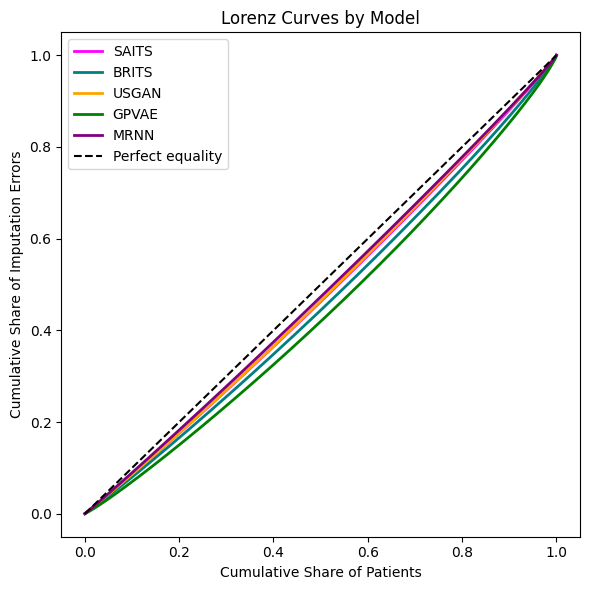

In [44]:
lorenz_curve_multi(
        models_data=[saits_ae_sum, brits_ae_sum, usgan_ae_sum, gpvae_ae_sum, mrnn_ae_sum],
        labels=["SAITS", "BRITS", "USGAN", "GPVAE", "MRNN"],
        colors=["magenta", "teal", "orange", "green", "purple"]
    )